# Overfitting (Printing accuracy at different steps)

In [8]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [9]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [10]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9000, 20) (1000, 20) (9000,) (1000,)


In [11]:

train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 50)]

In [12]:

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.765, test: 0.778
>2, train: 0.812, test: 0.806
>3, train: 0.883, test: 0.901
>4, train: 0.902, test: 0.913
>5, train: 0.914, test: 0.921
>6, train: 0.929, test: 0.931
>7, train: 0.937, test: 0.930
>8, train: 0.947, test: 0.931
>9, train: 0.956, test: 0.936
>10, train: 0.964, test: 0.941
>11, train: 0.968, test: 0.940
>12, train: 0.974, test: 0.933
>13, train: 0.980, test: 0.932
>14, train: 0.985, test: 0.922
>15, train: 0.988, test: 0.919
>16, train: 0.993, test: 0.924
>17, train: 0.995, test: 0.915
>18, train: 0.996, test: 0.917
>19, train: 0.997, test: 0.920
>20, train: 0.997, test: 0.914
>21, train: 0.998, test: 0.917
>22, train: 0.998, test: 0.915
>23, train: 0.998, test: 0.910
>24, train: 0.998, test: 0.917
>25, train: 0.999, test: 0.913
>26, train: 0.999, test: 0.912
>27, train: 0.999, test: 0.912
>28, train: 0.999, test: 0.914
>29, train: 1.000, test: 0.911
>30, train: 1.000, test: 0.915
>31, train: 1.000, test: 0.910
>32, train: 1.000, test: 0.917
>33, train: 1.000

# Cross-validation

In [13]:
#TASK 4

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_wine(return_X_y=True)
X.shape, y.shape

((178, 13), (178,))

Basic method to compute score

In [14]:
#TASK 4

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9814814814814815

Estimate the accuracy by splitting the data, computing the score 5 consecutive times (with different splits each time)

In [15]:
#TASK 4

from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.88888889, 0.94444444, 0.97222222, 1.        , 1.        ])

In [16]:
#TASK 4

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.04


# Using the different scoring parameter

In [17]:
#TASK 4

from sklearn import metrics

scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.88763285, 0.94515263, 0.97401299, 1.        , 1.        ])

Specified multiple metrics of predefined scorer names

In [18]:
#TASK 4

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
sorted(scores.keys())

scores['test_recall_macro']

array([0.9047619 , 0.95238095, 0.97222222, 1.        , 1.        ])

Calculate cross validation score by passing a cross validation iterator

In [19]:
#TASK 4

from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)


array([0.98148148, 0.92592593, 0.94444444, 0.98148148, 0.94444444])

Use an iterable yielding (train, test) splits as arrays of indices

In [20]:
#TASK 4

def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, y, cv=custom_cv)

array([1., 1.])

# Different type of Cross validation iterators

# K-fold

In [21]:
# TASK 4

import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=4)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


# Repeated K-Fold

In [22]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


# Leave One Out (LOO)

In [23]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))


[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


# Validation curve

In [ ]:
######   MY

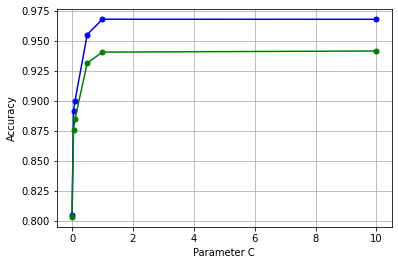

In [24]:
# TASK 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
#
# IRIS Dataset is loaded
#
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['species'] = iris.target
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=1,
stratify=df.iloc[:, -1])
#
# Create the pipeline having steps for standardization and estimator as LogisticRegression
#
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))
#
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]
train_scores, test_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=10,
param_name='logisticregression__C', param_range=param_range)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# ROC

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [26]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

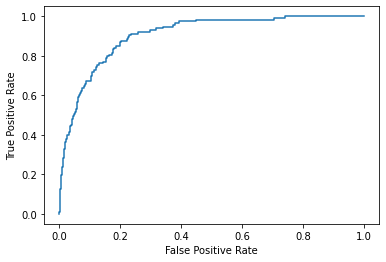

In [27]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

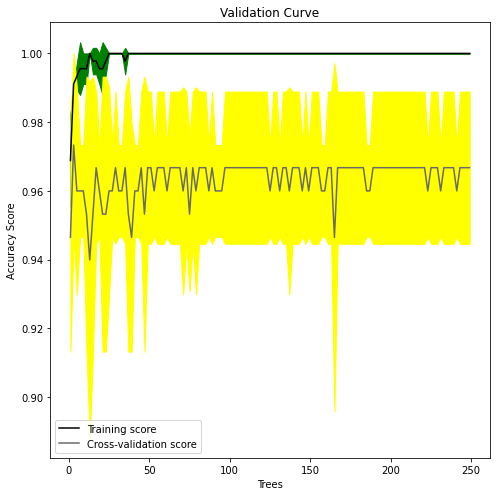

In [28]:
#TASK 4

from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_iris()

X, y = digits.data, digits.target

param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),X, y, param_name="n_estimators", param_range=param_range,cv=4, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="yellow")
plt.title("Validation Curve")
plt.xlabel("Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()